### Задача 1

#### Даны значения величины заработной платы заемщиков банка (salary) и значения их поведенческого кредитного скоринга (scoring):
#### salary = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110]
#### scoring = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]

#### Возьмём в качестве признака значение salary, а в качестве целевой переменной - scoring.

#### 1.Найдите коэффициенты линейной регрессии с помощью формул для парной регрессии, а затем с помощью метода наименьших квадратов.
#### 2.Постройте scatter plot по данным и отметьте на нём прямую линейной регрессии, полученную в п. 1.
#### 3.Посчитайте коэффициент детерминации, среднюю ошибку аппроксимации.
#### 4.Оцените построенное уравнение регрессии с помощью F-критерия Фишера.
#### 5.Оцените значимость получившихся параметров уравнения регрессии
####   и постройте для них доверительные интервалы с помощью t-статистики Стьюдента.

### Решение:

In [1]:
import numpy as np

In [2]:
x1 = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110], dtype=np.float64)
y1 = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832], dtype=np.float64)

#### 1. Найдем коэффициенты линейной регресии c помощью формул для партной регрессии:

In [3]:
b1 = (np.mean(x1 * y1) - np.mean(x1) * np.mean(y1)) / (np.mean(x1 ** 2) - np.mean(x1) ** 2)
b1

2.620538882402765

In [4]:
b0 = np.mean(y1) - b1 * np.mean(x1)
b0

444.1773573243596

#### Модель линейной регрессии имеет вид:
#### y = b0 + b1 * x = 444.1773573243596 + 2.620538882402765 * x

#### Найдем коэффициенты линейной регрессии с помощью метода наименьших квадратов:

In [5]:
import pandas as pd

In [6]:
df = pd.DataFrame({'salary':  [35, 45, 190, 200, 40, 70, 54, 150, 120, 110],
                   'scoring': [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]})
df

,salary,scoring
0,35,401
1,45,574
2,190,874
3,200,919
4,40,459
5,70,739
6,54,653
7,150,902
8,120,746
9,110,832


In [7]:
x2 = df['salary'].values.reshape(-1, 1)
x2

array([[ 35],
       [ 45],
       [190],
       [200],
       [ 40],
       [ 70],
       [ 54],
       [150],
       [120],
       [110]], dtype=int64)

In [8]:
y2 = df['scoring'].values.reshape(-1, 1)
y2

array([[401],
       [574],
       [874],
       [919],
       [459],
       [739],
       [653],
       [902],
       [746],
       [832]], dtype=int64)

#### Добавим к массиву x2 столбец из единиц, соответствующий фиктивному фактору.

In [9]:
x2.shape

(10, 1)

In [10]:
ones = np.ones((x2.shape[0], 1))
ones

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.]])

In [11]:
x2 = np.hstack((ones, x2))
x2

array([[  1.,  35.],
       [  1.,  45.],
       [  1., 190.],
       [  1., 200.],
       [  1.,  40.],
       [  1.,  70.],
       [  1.,  54.],
       [  1., 150.],
       [  1., 120.],
       [  1., 110.]])

In [12]:
x2.shape

(10, 2)

In [13]:
XTX = x2.T.dot(x2)
XTX

array([[1.00000e+01, 1.01400e+03],
       [1.01400e+03, 1.37766e+05]])

In [14]:
np.linalg.det(XTX)

349464.00000000023

#### Определитель нулю не равен, поэтому можно записать аналитическое решение:

In [15]:
XTX_inv = np.linalg.inv(XTX)
b = XTX_inv.dot(x2.T).dot(y2)
print(b)

[[444.17735732]
 [  2.62053888]]


#### Получили аналогичную модель линейной регрессии вида:
#### y = b0 + b1 * x = 444.17735732 + 2.62053888 * x

#### 2. Визуализируем данные на графике:

In [16]:
from matplotlib import pyplot as plt
plt.style.use('fivethirtyeight')

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

Text(0, 0.5, 'Scoring')

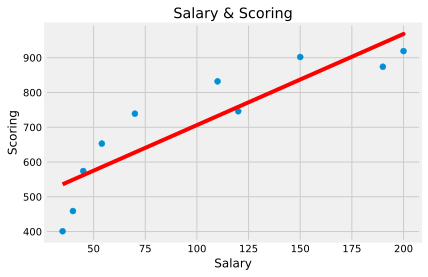

In [17]:
ox = x1
oy = b0 + b1 * ox

plt.scatter(x1, y1)
plt.plot(ox, oy, color='red')

plt.title('Salary & Scoring')
plt.xlabel('Salary')
plt.ylabel('Scoring')

#### 3. Посчитаем коэффициент детерминации. Для этого создадим массив из предсказанных значений:

In [18]:
z1 = b0 + b1 * x1

print(f'real: {y1}')
print(f'pred: {z1}')

real: [401. 574. 874. 919. 459. 739. 653. 902. 746. 832.]
pred: [535.89621821 562.10160703 942.07974498 968.2851338  548.99891262
 627.61507909 585.68645697 837.25818968 758.64202321 732.43663439]


In [19]:
R1 = z1.var() / y1.var()
R1

0.7876386635293678

#### Проверка:

In [20]:
np.corrcoef(x1, y1) ** 2

array([[1.        , 0.78763866],
       [0.78763866, 1.        ]])

#### То есть, 79% дисперсии переменной Scoring учитывается моделью,
#### а оставшиеся 21% - обусловлены иными факторами, которые модель не учла.

#### Далее оценим качество модели, посчитав среднюю ошибку апроксимации:

In [21]:
np.abs((y1 - z1) / y1).mean()

0.11469251843561709

#### Значение 11% средней ошибки апроксимации говорит о том, что теоретические значения почти близки к тем, что выдает модель ЛР.

#### 4. Оценим статистическу значимостьуравнения ЛР с помощью F-критерия Фишера:

In [22]:
k1 = 1
k2 = 8

T1 = (R1 / (1- R1)) * (k2 / k1)
T1

29.67164085966437

#### Для уровня значимости alpha = 0.05 посчитаем критическое значение:

In [23]:
from scipy import stats

In [24]:
alpha = 0.05

F_crit = stats.f.ppf(1 - alpha, k1, k2)
F_crit

5.317655071578714

#### Так как T1 > T_crit, уравнение регрессии статистически значимо.

#### 5. Оценим статистическу значимость каждого параметра b0 и b1 в уравнении регрессии с помощью t-распределения:

In [25]:
b0, b1

(444.1773573243596, 2.620538882402765)

#### Стандартная ошибка для парамтера b1 (коэффициента наклона):

In [26]:
def standard_error_slope(x, y, z):
    n = x.shape[0]
    
    upper = ((y - z) ** 2).sum() / (n-2)
    lower = ((x - x.mean()) ** 2).sum()
    
    return np.sqrt(upper / lower)

In [27]:
s_slope = standard_error_slope(x1, y1, z1)
s_slope

0.48108279568516005

#### Для уровня значимости alpha = 0.05 и n = 10 по таблице критических значений t-критерия Стьюдента находим t = 2.306.

In [28]:
T = b1 / s_slope
T

5.447168150485579

#### Значение статистики T попало в критическую область, значит, гипотеза о равенстве нулю параметра b1 ответгается.
#### Посчитаем доверительный интервал для параметра b1:

In [29]:
t = 2.306
(b1 - t * s_slope, b1 + t * s_slope)

(1.5111619555527858, 3.729915809252744)

#### Аналогично стандартная ошибка для параметра b0 (коэффициента сдвига):

In [30]:
def standard_error_intersept(x, y, z):
    return standard_error_slope(x, y, z) * np.sqrt((x ** 2).mean())

In [31]:
s_intersept = standard_error_intersept(x1, y1, z1)
s_intersept

56.46649755068153

#### Значение статистики T:

In [32]:
T = b0 / s_intersept
T

7.866210524668863

#### Значение попало в критическую область, значит, значение параметра b0 является значимым.

#### Доверительный интервал для параметра b0:

In [33]:
(b0 - t * s_intersept, b0 + t * s_intersept)

(313.965613972488, 574.3891006762312)

### Задача 2

#### В каких случаях для вычисления доверительных интервалов и проверки статистических гипотез
#### используется таблица значений функции Лапласа, а в каких - таблица квантилей распределения Стьюдента?

### Ответ: 

#### Таблицу значений функции Лапласса (или правило двух или трех сигм) используем,
#### когда дана дисперсия (или дано теоретическое, а не посчитанное по выборке, среднеквадратическое отклонение).
#### Если дисперсия не дана, то используем таблицу квантилей распределения Стьюдента.